In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
df = pd.read_parquet("mount-data_50.parquet")
df

,OcsMountTrajectory,ImMountTrajectory
0,"[1.2446510881631887, 0.519943672422003, 5.3068...","[0.0, 0.0, 0.0]"
1,"[1.244648736875653, 0.5199466887238265, 5.3068...","[1.2446510836242868, 0.5199436701065627, 5.306..."
2,"[1.244646383834804, 0.5199497072620045, 5.3068...","[1.244650175358954, 0.5199442253833078, 5.3068..."
3,"[1.2446440304900313, 0.5199527261772237, 5.306...","[1.2446490367508216, 0.5199460440304136, 5.306..."
4,"[1.2446416791484485, 0.5199557425098754, 5.306...","[1.2446469235708884, 0.5199493640834218, 5.306..."
...,...,...
95,"[1.2444275407315157, 0.520230388369524, 5.3069...","[1.2444299642994574, 0.5202272761376314, 5.306..."
96,"[1.2444252022498479, 0.5202333870306258, 5.306...","[1.2444276058809538, 0.5202302982389477, 5.306..."
97,"[1.2444228481965904, 0.5202364056465327, 5.306...","[1.2444252564023834, 0.520233316053174, 5.3069..."
98,"[1.244420497685769, 0.5202394197071288, 5.3069...","[1.2444228988566566, 0.5202363298141898, 5.306..."


In [125]:
ocs = np.vstack(df["OcsMountTrajectory"])*180/np.pi
im = np.vstack(df["ImMountTrajectory"])*180/np.pi
t = np.arange(ocs.shape[0])/20
zp = ocs[0,:]
zp

array([ 71.31325432,  29.79057801, 304.05954219])

In [126]:
rel_ocs = (ocs[:-1,:] - ocs[0,:])*3600
rel_im = (im[1:,:] - im[1,:])*3600
t = np.arange(rel_ocs.shape[0])/20


Text(0, 0.5, 'Rel. traj. [arcsec]')

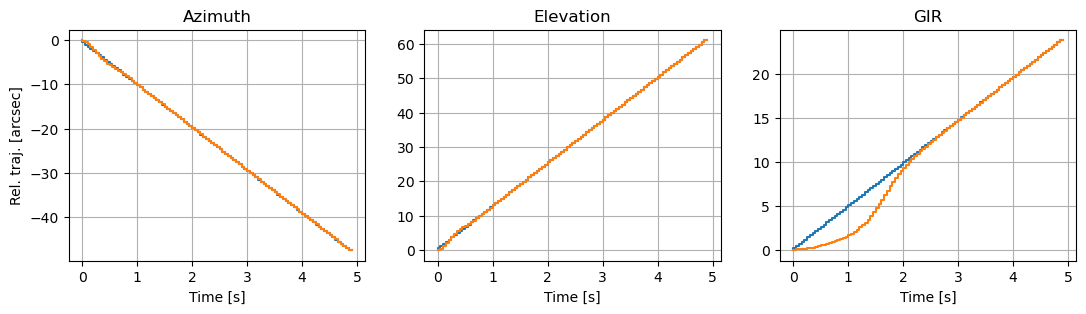

In [127]:
titles = ["Azimuth", "Elevation", "GIR"]
fig, axs = plt.subplots(ncols=3, figsize=(13, 3))
for i in range(3):
    ax = axs[i]
    ax.step(t,rel_ocs[:,i])
    ax.step(t,rel_im[:,i])
    ax.set_xlabel("Time [s]")
    ax.set_title(titles[i])
    ax.grid()
axs[0].set_ylabel("Rel. traj. [arcsec]")

In [128]:
traj_error = (rel_ocs-rel_im)*1e3
traj_error[-1,:]

array([-11.29833415,  15.53308446,  10.26801515])

Text(0, 0.5, 'Rel. traj. error [mas]')

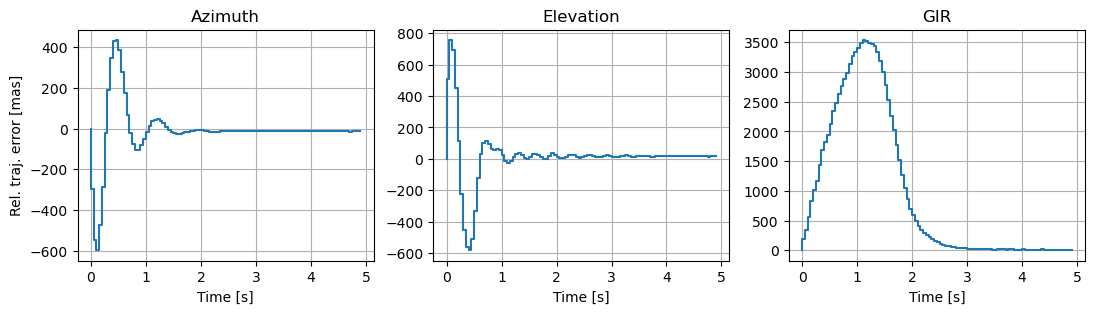

In [129]:
titles = ["Azimuth", "Elevation", "GIR"]
fig, axs = plt.subplots(ncols=3, figsize=(13, 3))
for i in range(3):
    ax = axs[i]
    ax.step(t,traj_error[:,i])
    ax.set_xlabel("Time [s]")
    ax.set_title(titles[i])
    ax.grid()
axs[0].set_ylabel("Rel. traj. error [mas]")

In [115]:
df = pd.read_parquet("mount-data_50.parquet")
ocs = np.vstack(df["OcsMountTrajectory"])*180/np.pi
t = np.arange(ocs.shape[0])/20
im = np.vstack(df["ImMountTrajectory"])*180/np.pi
df = pd.read_parquet("mount-data_1.parquet")
ocs_i = np.vstack(df["OcsMountTrajectory"])*180/np.pi
t_i = np.arange(ocs_i.shape[0])/1000

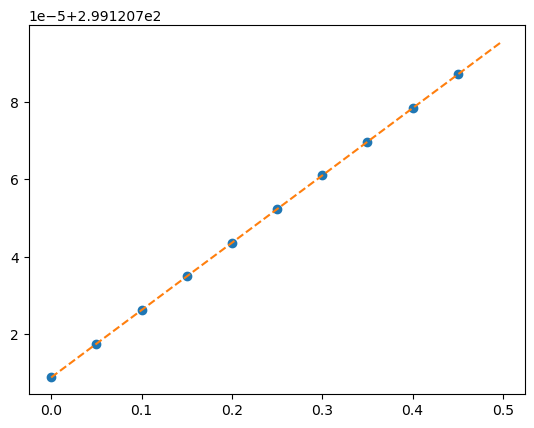

In [118]:
fig,ax = plt.subplots()
ax.plot(t[:10],ocs[:10,2],'o')
ax.plot(t_i[50:550]-t_i[50],ocs_i[50:550,2],'--')
#ax.set_xlim([0, 1])

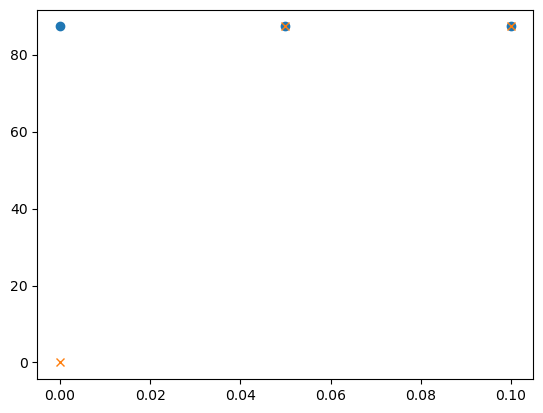

In [119]:
fig,ax = plt.subplots()
ax.plot(t[:3],ocs[:3,0],'o')
ax.plot(t[:3],im[:3,0],'x')


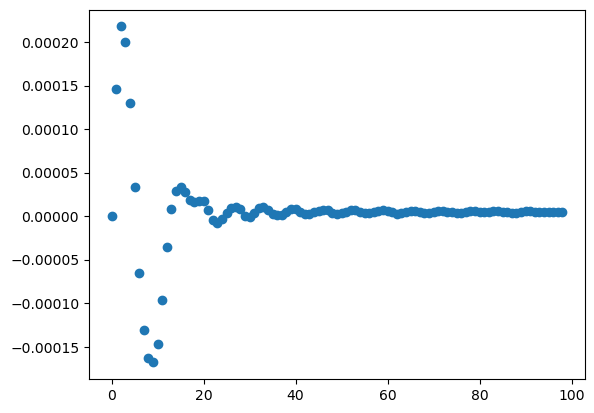

In [123]:
fig,ax = plt.subplots()
ax.plot(ocs[:-1,1]-im[1:,1],'o')